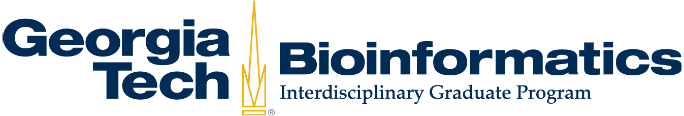

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>Project 7: <i>Introduction to single cell gene expression analysis</i></h3>
    <h4>Deadline: 5:30PM, December 13th, 2023</h4>
    <h4>Total Points: 300</h4>
    
</div>

<div class="alert alert-block alert-danger">
    <h3>Alert!</h3>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

<div class="alert alert-block alert-info">
    <h2>Please folow the following guidelines:</h2>
    <p>1. You can use PACE RStudio for this project, but please bring this analysis code to the jupyter notebook for submission. (Write your R code in the cells of this notebook with appropriate comments).</p>
    <p>2. Figures are the most important aspect of this project, so please download (from PACE RStudio) and show you result figures in this jupyter notebook using markdown.</p>
    <p>3. This project will focus on a simple analysis of a single cell gene expression dataset. The sections are divided broadly, so please explain your work in as much detail as possible.</p>
</div>

---

# **1. Reading the data**
### *Total Questions: 1*
### *Total Points: 50*


---

<div class="alert alert-block alert-warning">
    <h3>1. Locate and read the data</h3>
    <p>We have raw data files in: /storage/ice-shared/biol6150/Data/SingleCell/ProjectDataset/. Read this data using Seurat and get ready for QC</p> 
</div>

In [3]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

<div class="alert alert-block alert-warning">
    <h3> R script</h3>
    <p> The R script we have written is SCG.R and is in the same directory as this notebook. Path - "~/biol6150/ProjectSubmissions/Group18-AloHA/Project7" </p> 
</div>

In [1]:
#check the data file
!ls -lh /storage/ice-shared/biol6150/Data/SingleCell/ProjectDataset/

total 83M
-rw-r--r-- 1 ssharma454 gtperson 82M Mar 29  2022 10k_PBMC_3p_nextgem_Chromium_X_intron_raw_feature_bc_matrix.h5


#### R-code
<code>
#Load the required packages
library(dplyr)
library(Seurat)
library(patchwork)
library(hdf5r)
library(cowplot)

#Accessing the data.
setwd("~/biol6150/ProjectSubmissions/Group18-AloHA/Project7")

#Load the dataset
pbmc.data <- Seurat::Read10X_h5("/storage/ice-shared/biol6150/Data/SingleCell/ProjectDataset/10k_PBMC_3p_nextgem_Chromium_X_intron_raw_feature_bc_matrix.h5", use.names = TRUE, unique.features = TRUE)
head(pbmc.data)
</code>




After loading the required packages, setting the working directory, we load the dataset from the shared folder. 

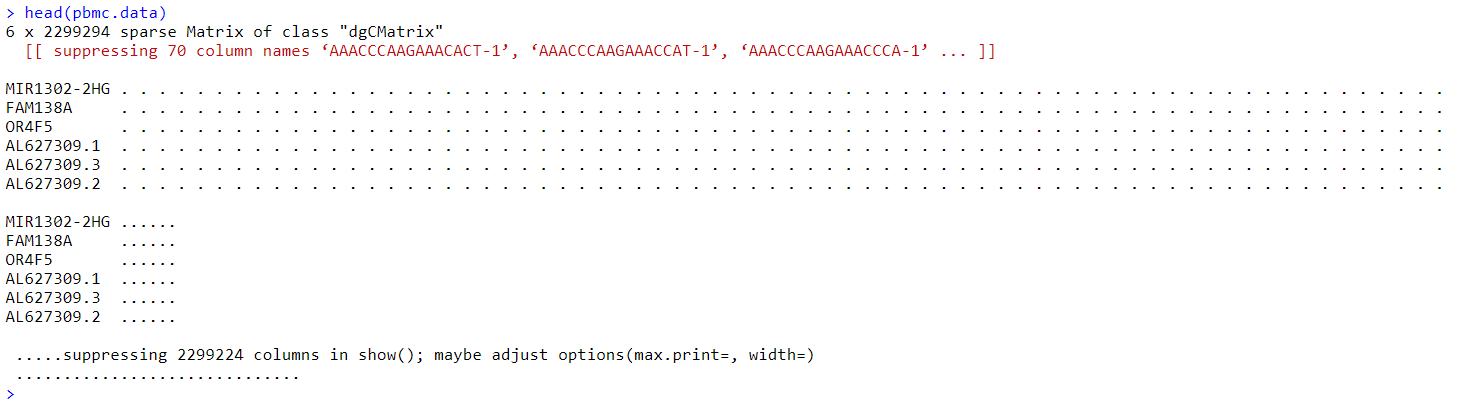

<div class="alert alert-block alert-warning">
    <h3>2. QC and normalization</h3>
    <p>Perform QC, normalization and feature selection on this dataset. Show your feature selection scatter plot in this notebook (and any other figures you create along the way)</p>
</div>

In [14]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

##### R Code

<code>
#Perform QC, normalisation and feature selection on this dataset

#Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

#The number of unique genes(nFeature_RNA) and total molecules(nCount_RNA) are automatically calculated during CreateSeuratObject().
#Show QC metrics for the first 5 cells
head(pbmc@meta.data, 5)

#Performing QC

#calculate the percentage of reads mapped to the mitochondrial genome(which indicates extensive mitochondrial contamination, low-quality & dying cells)
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

#Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

#Plotting FeatureScatter plot to visualize nCount_RNA vs mitocondrial percentage and nCount_RNA vs nFeature_RNA
plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

#Filter cells that have unique feature counts over 2,500 or less than 200 and have >5% mitochondrial counts
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

#perform normalisation
pbmc <- NormalizeData(pbmc)

#perform feature selection with number of genes greater than 2000
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

#Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

#resize the Plots window to see the graph
png("myplot.png", width = 15, height = 6, units = "in", res = 300)

#plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE, xnudge = 0, ynudge = 0)
plot1 + plot2
dev.off()
</code>

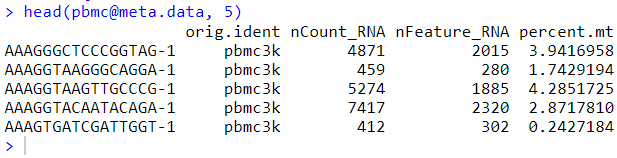

#### Checking the top 10 most variable features

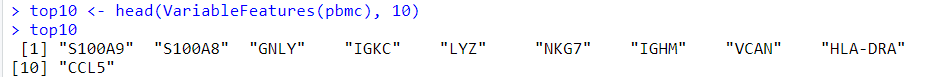

#### Visualizing the QC metrics as violin plot
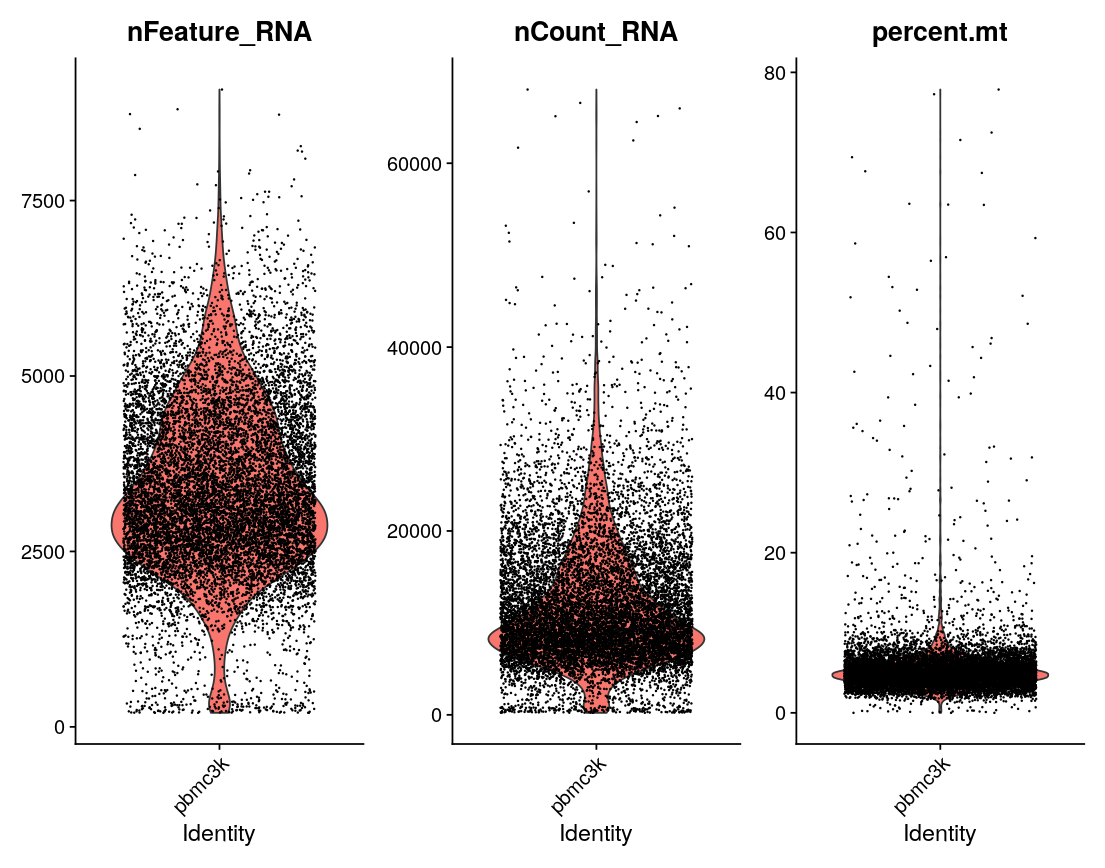

#### Plotting FeatureScatter plot to visualize nCount_RNA vs mitocondrial percentage and nCount_RNA vs nFeature_RNA

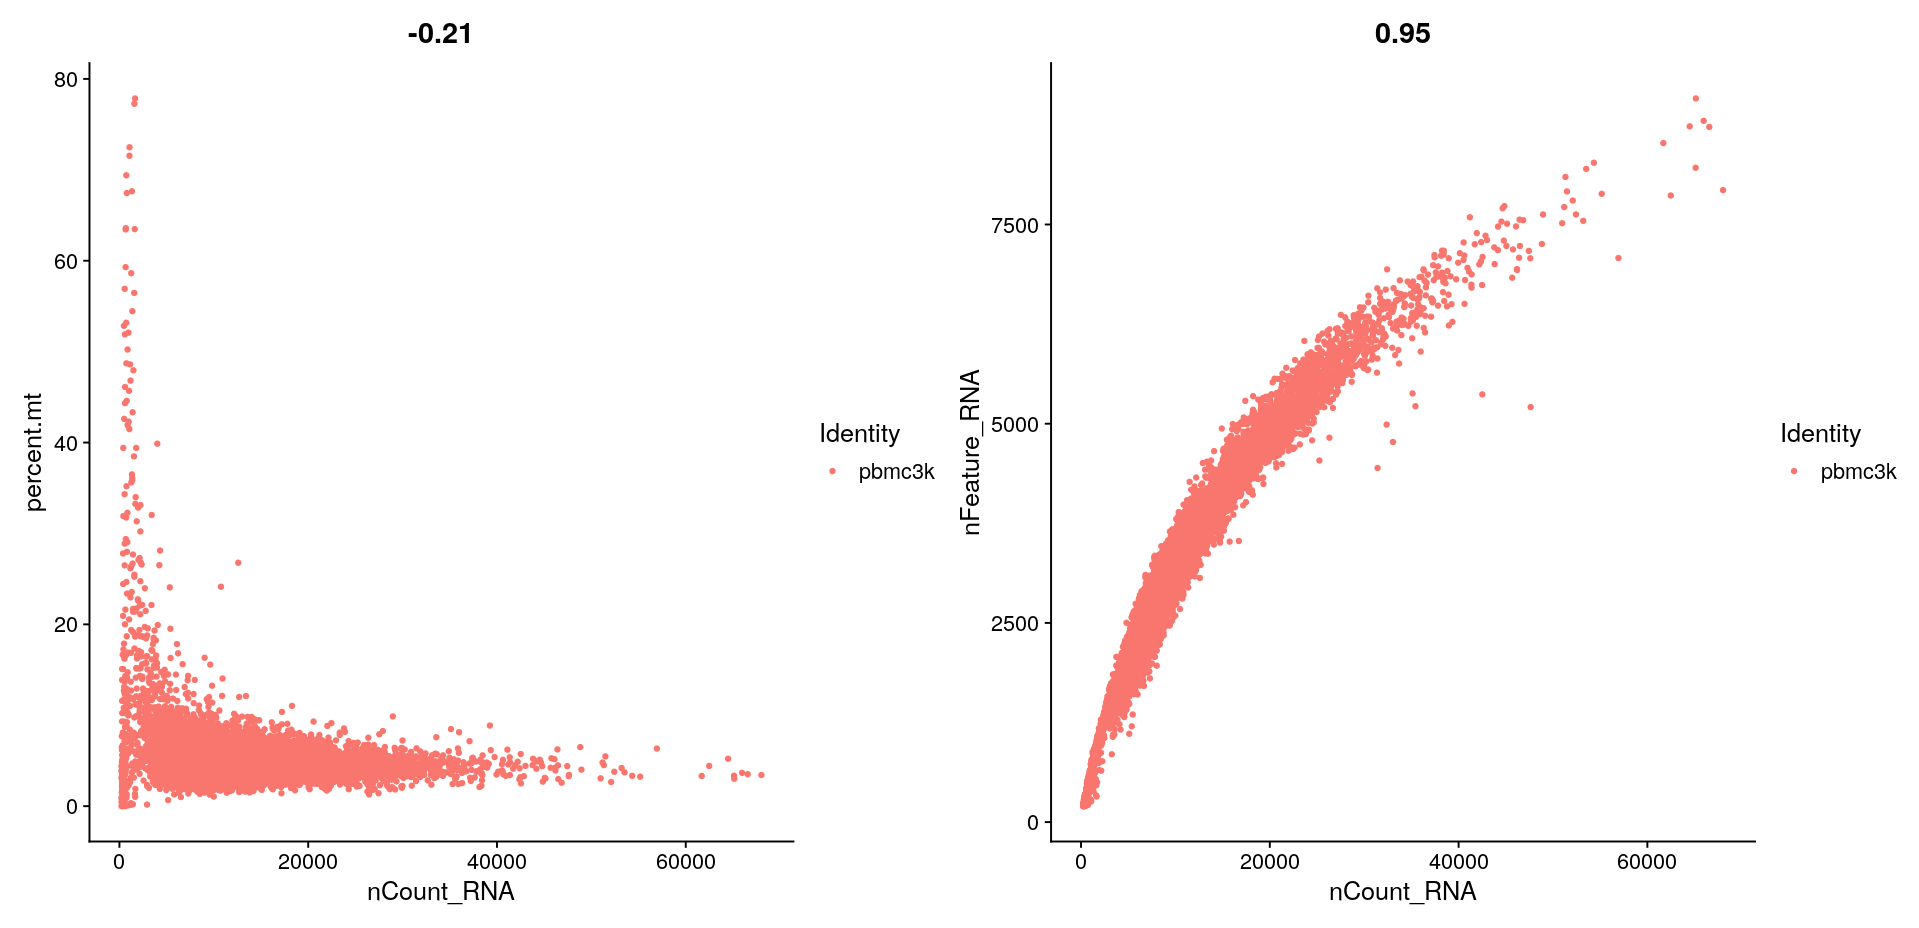

#### Plot variable features with and without labels


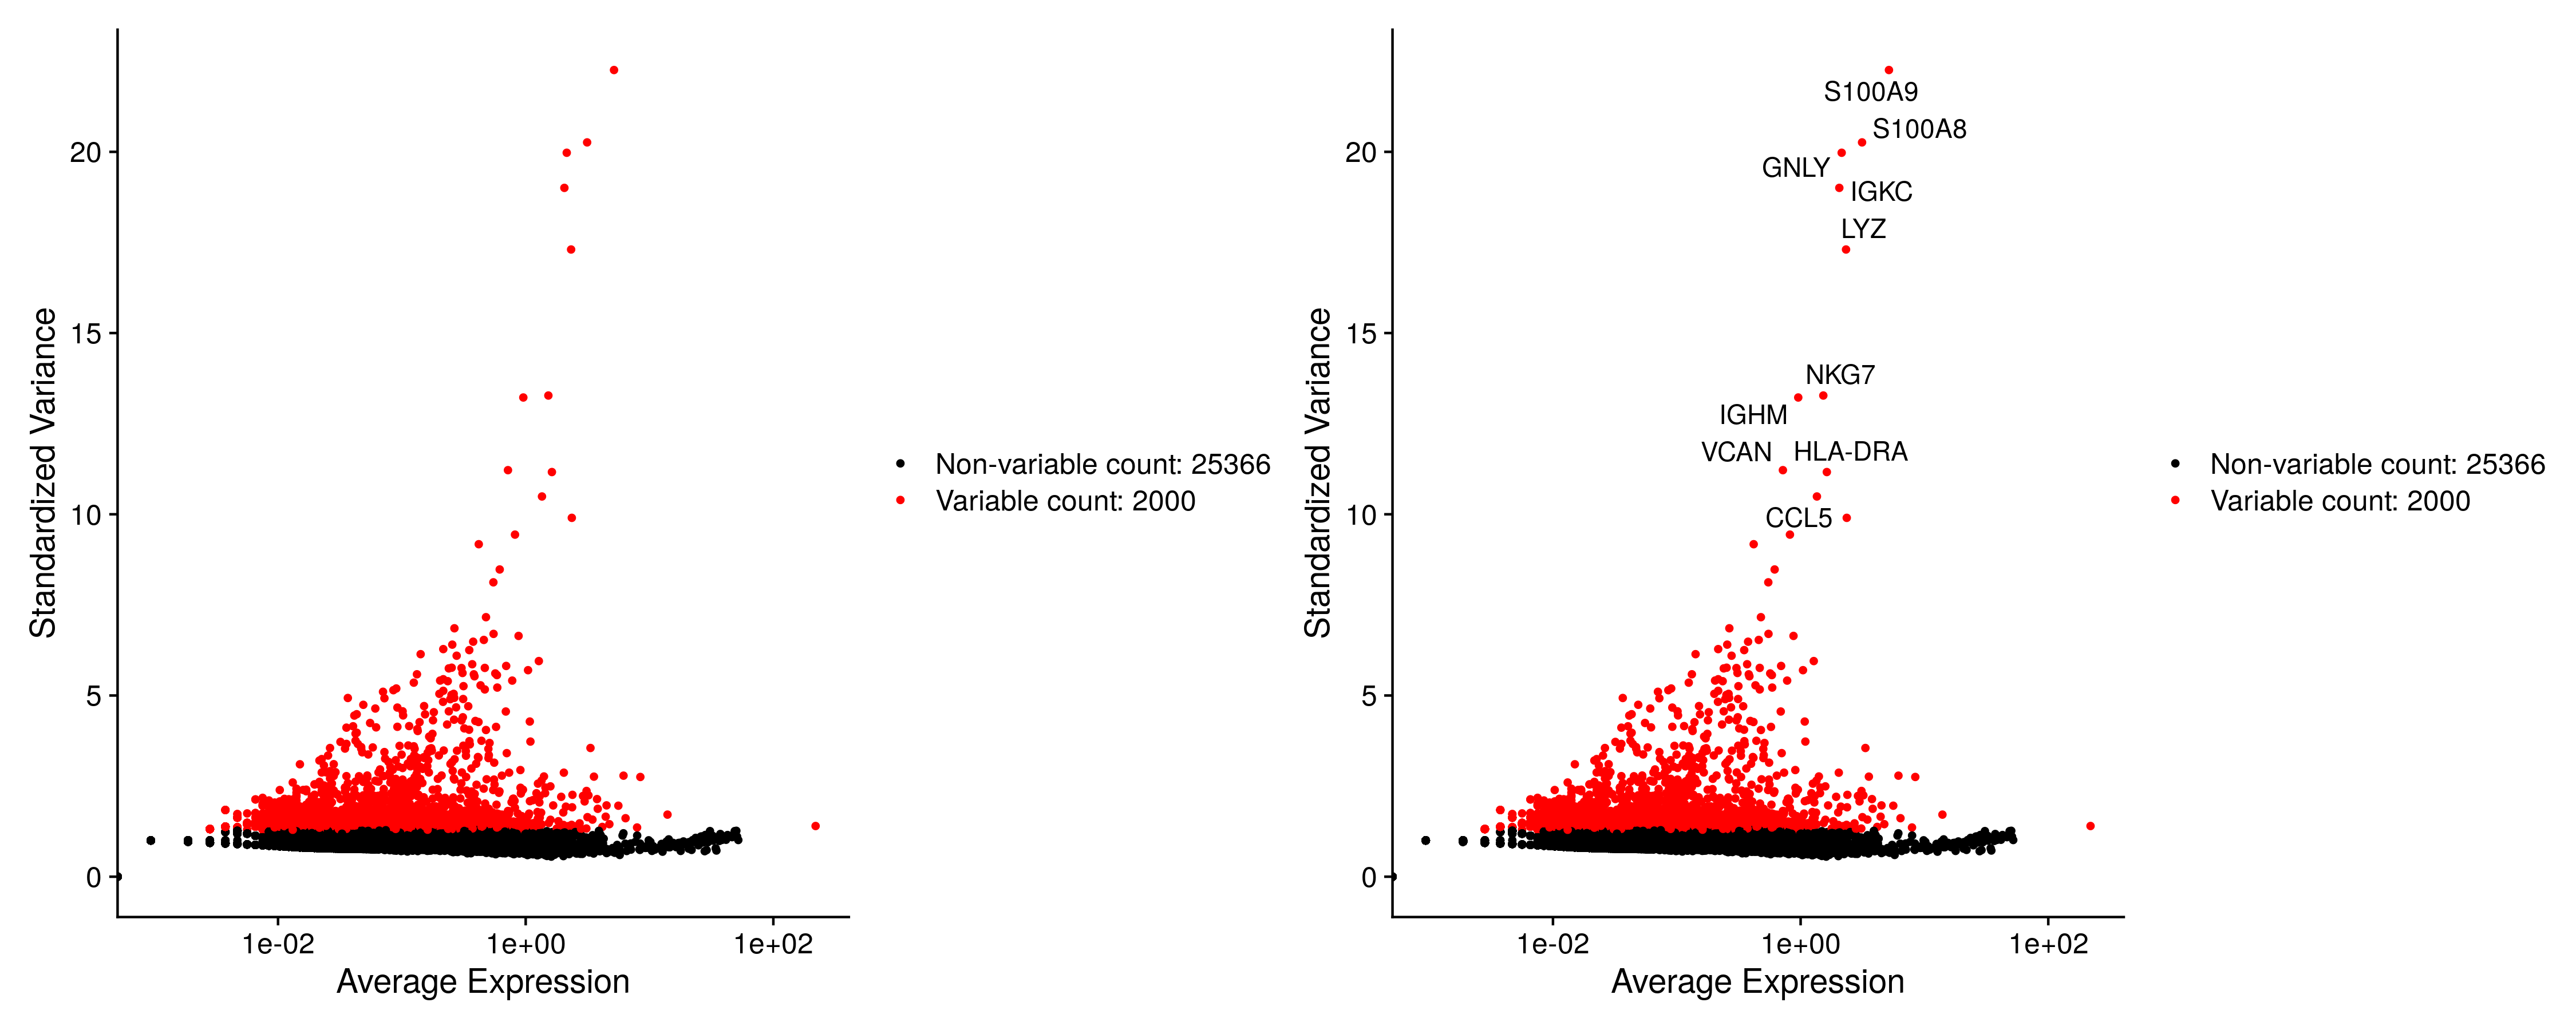

# **3. Dimensionality reduction and clustering**
### *Total Questions: 2*
### *Total Points:  50+50 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Can you see any clusters in your data?</h3>
    <p>1. Plot your PCA</p>
    <p>1. Plot your UMAP</p>
</div>

In [6]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

#### R-Code

#Scaling the data

all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

#perform PCA

pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

#Examine and visualize PCA results a few different ways

print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

#Visualize top genes associated with reduction components

VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

#Plot showing dimensional reduction technique on a 2D scatter plot 

DimPlot(pbmc, reduction = "pca") + NoLegend()

#creating Elbow plot which ranks principle components based on the percentage of variance explained by each one

ElbowPlot(pbmc)


#create non-linear dimensionality reduction: UMAP

pbmc <- RunUMAP(pbmc, dims = 1:10)

#individual clusters

DimPlot(pbmc, reduction = "umap")

#Saving the RDS object 

file_path <- "~/biol6150/ProjectSubmissions/Group18-AloHA/Project7/pbmc_tutorial.rds"
saveRDS(pbmc, file = file_path)

#### Check top 5 up and down regulated genes in first 5 clusters

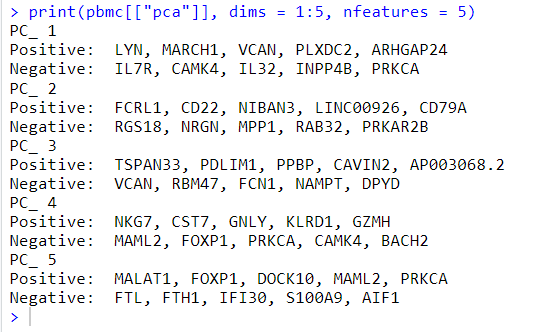

##### Visualize top genes associated with reduction components

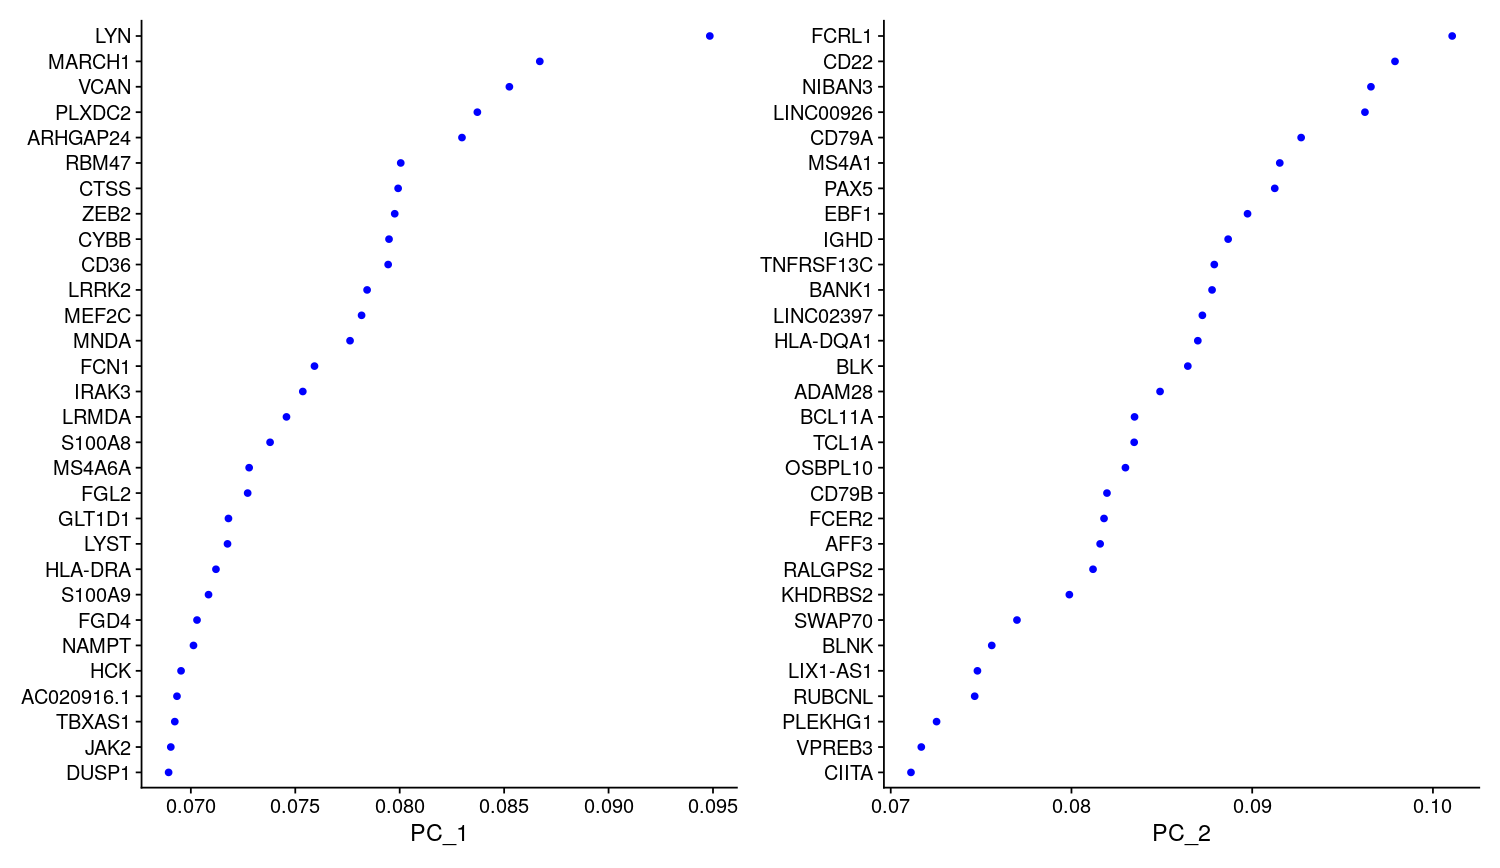

#### PCA without clustering
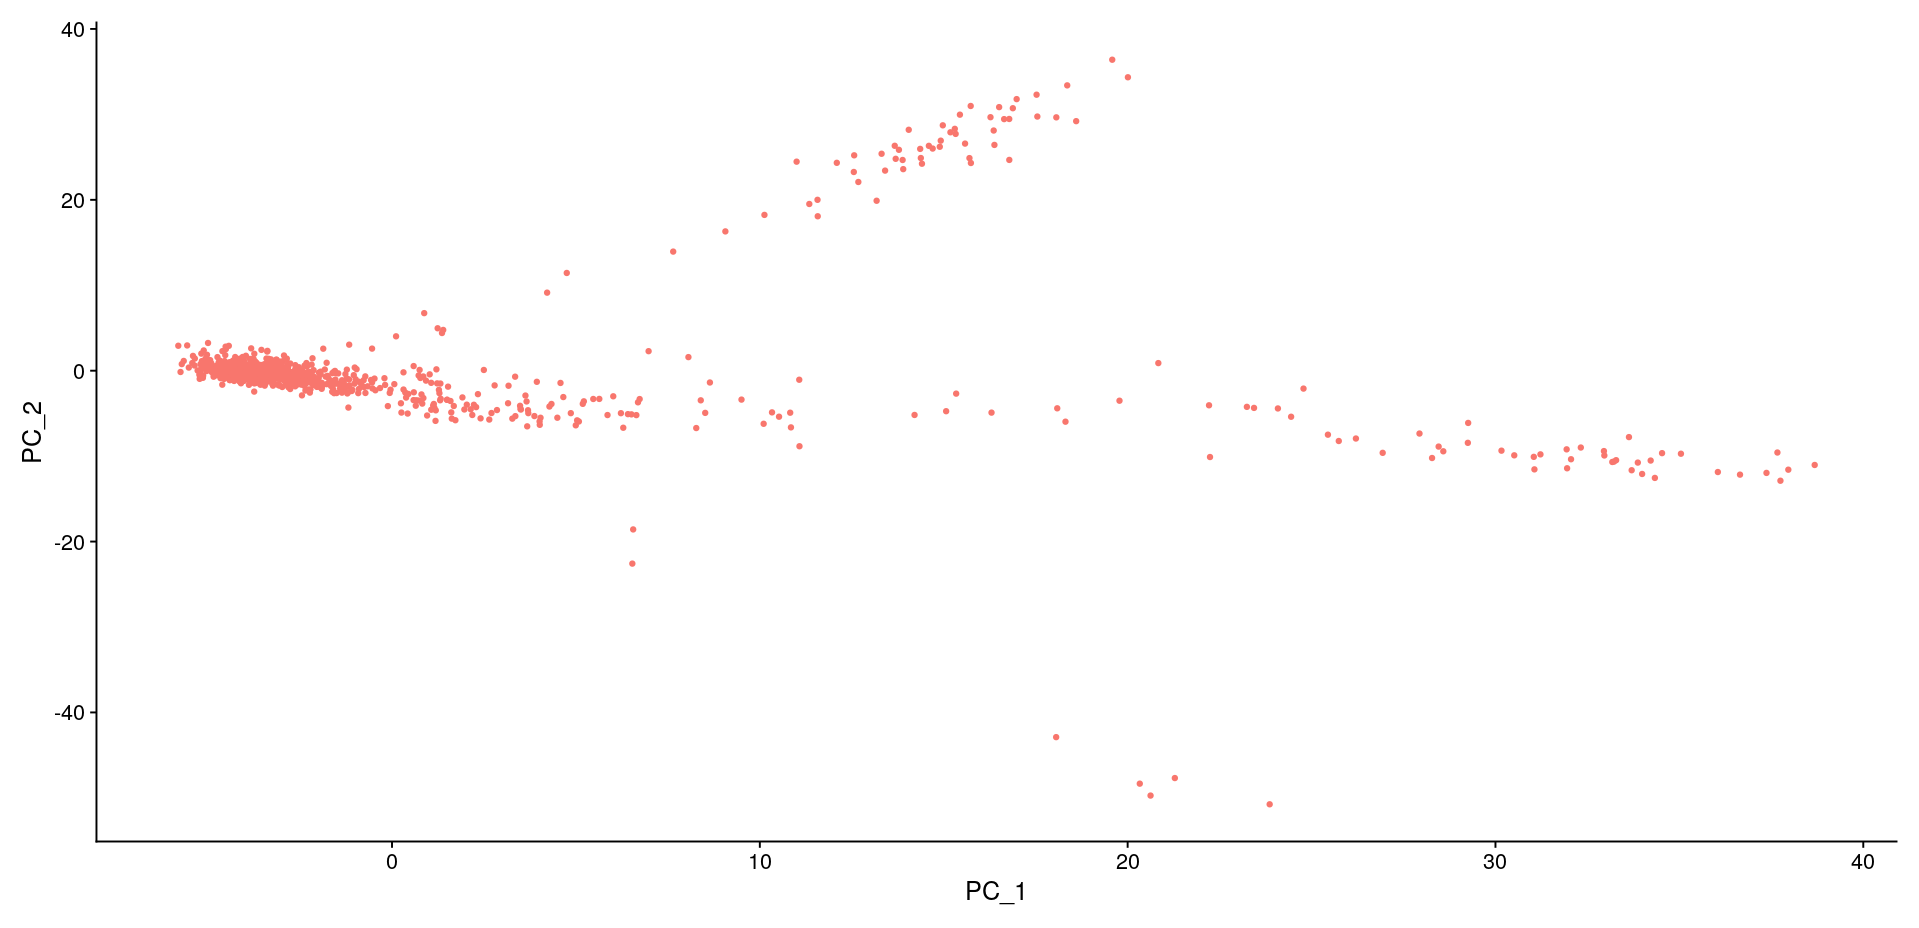

#### Elbow plot showing ranked principle components based on the percentage of variance

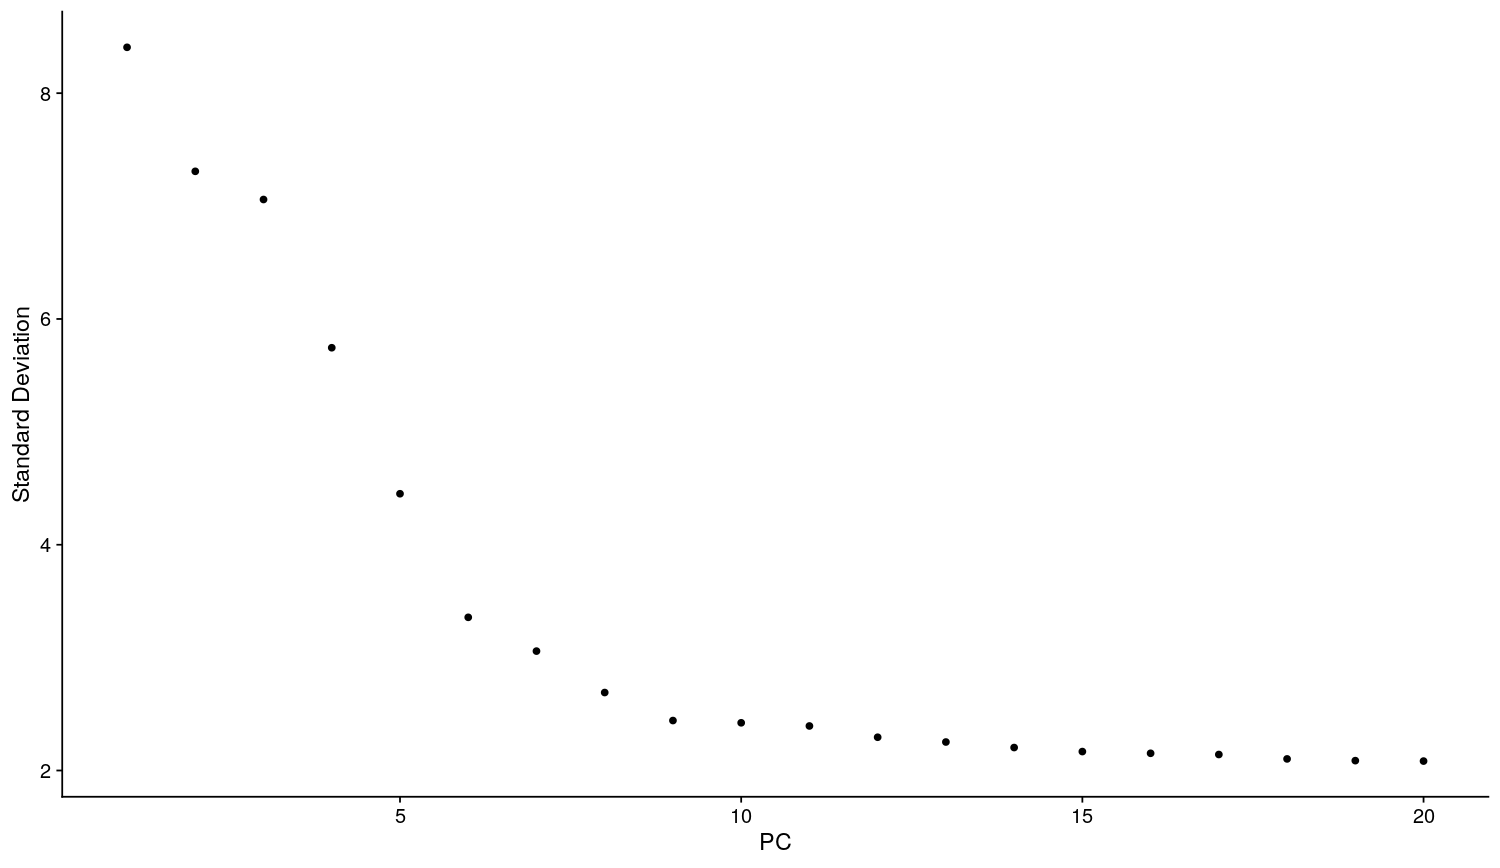

#### Umap without clustering

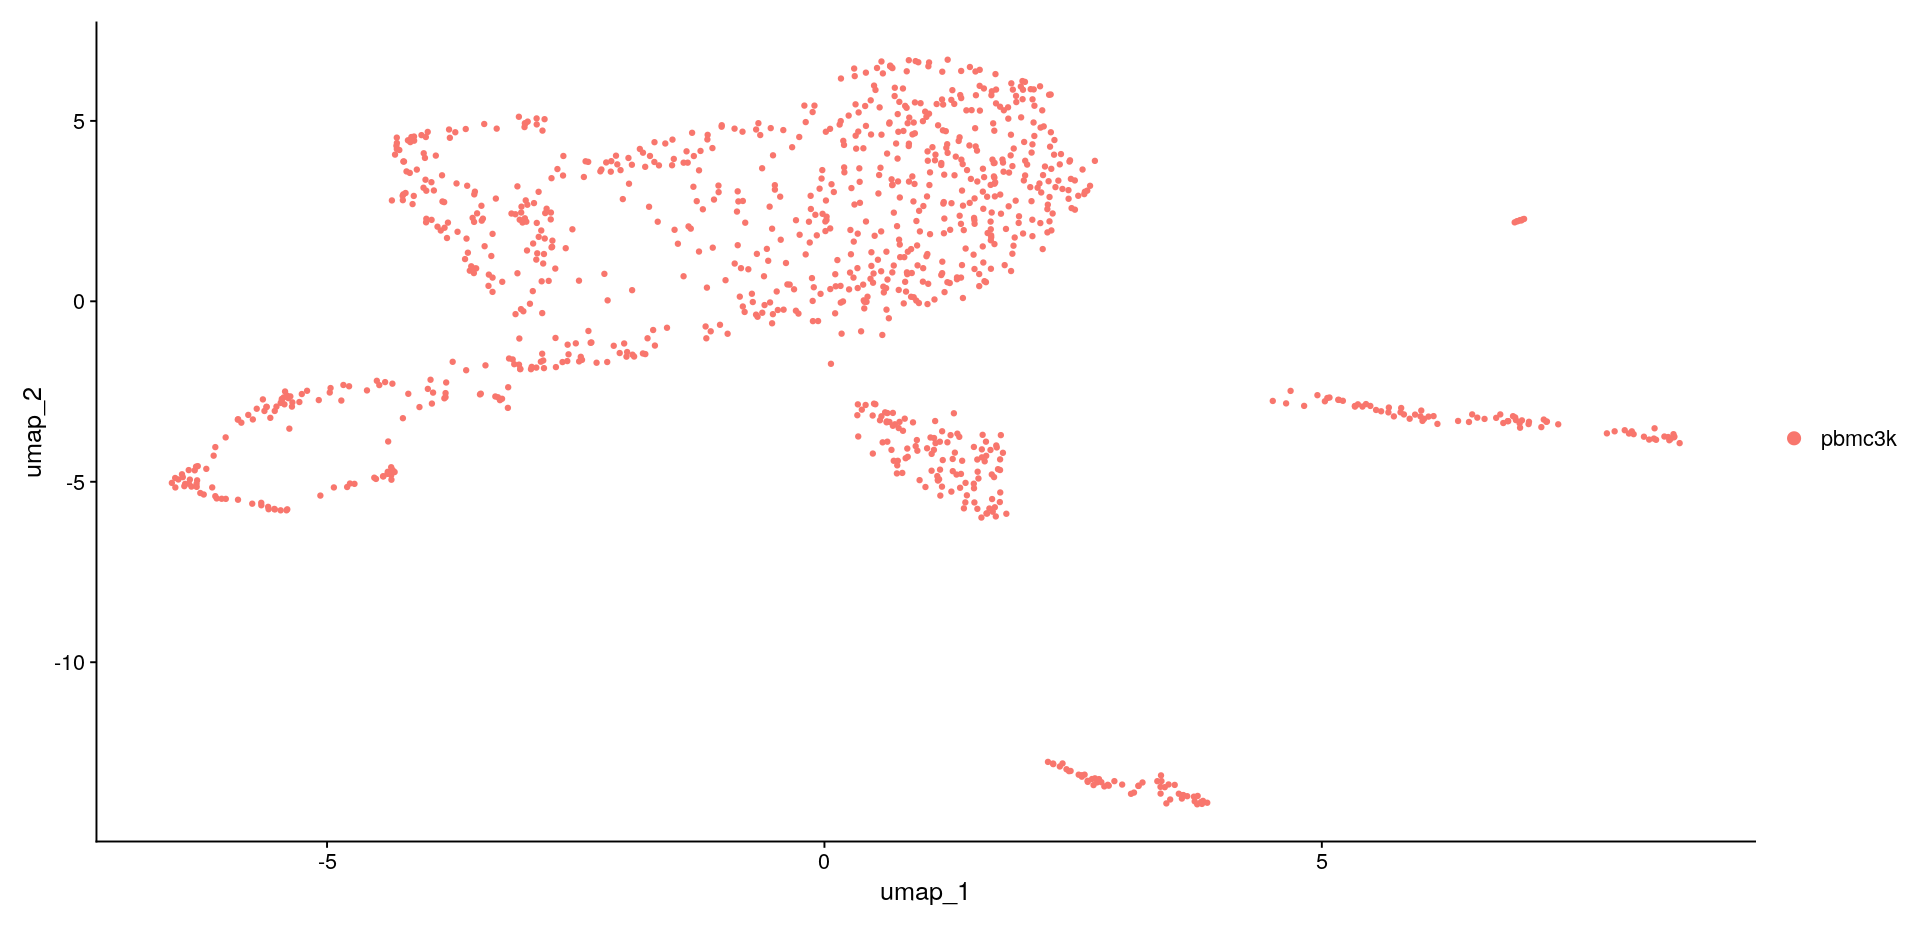

<div class="alert alert-block alert-warning">
    <h3>3.2 Perform clustering of cells using graph based clustering approach as implemented in Seurat's tutorial.</h3>
    <p>1. Plot your PCA (show clusters this time)</p>
    <p>1. Plot your UMAP (show clusters this time)</p>
</div>

In [ ]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

## After cluster assignment

#### R-code

#Clustering based on cellular distance metric

pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.3)

#check cluster IDs of the first 5 cells

head(Idents(pbmc), 5)

#perform PCA

pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

#Examine and visualize PCA results a few different ways

print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

#Visualize top genes associated with reduction components

VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

#Plot showing dimensional reduction technique on a 2D scatter plot 

DimPlot(pbmc, reduction = "pca") + NoLegend()

#Creating Elbow plot which ranks principle components based on the percentage of variance explained by each one

ElbowPlot(pbmc)


#Create non-linear dimensionality reduction: UMAP

pbmc <- RunUMAP(pbmc, dims = 1:10)

#Individual clusters

DimPlot(pbmc, reduction = "umap")

#Saving the RDS object 

file_path <- "~/biol6150/ProjectSubmissions/Group18-AloHA/Project7/pbmc_cluster_assgn.rds"
saveRDS(pbmc, file = file_path)

#### check cluster IDs of the first 10 cells

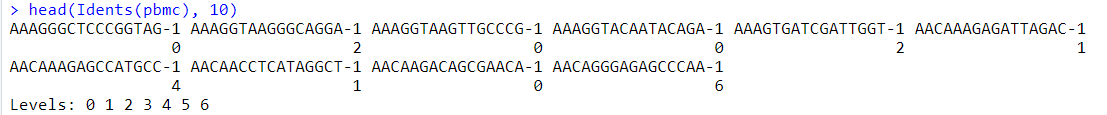

#### Check top 5 up and down regulated genes in first 5 clusters

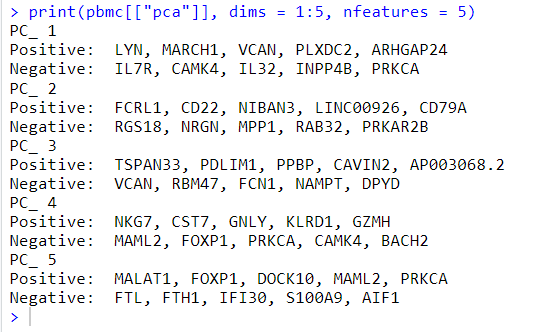

##### Visualize top genes associated with reduction components


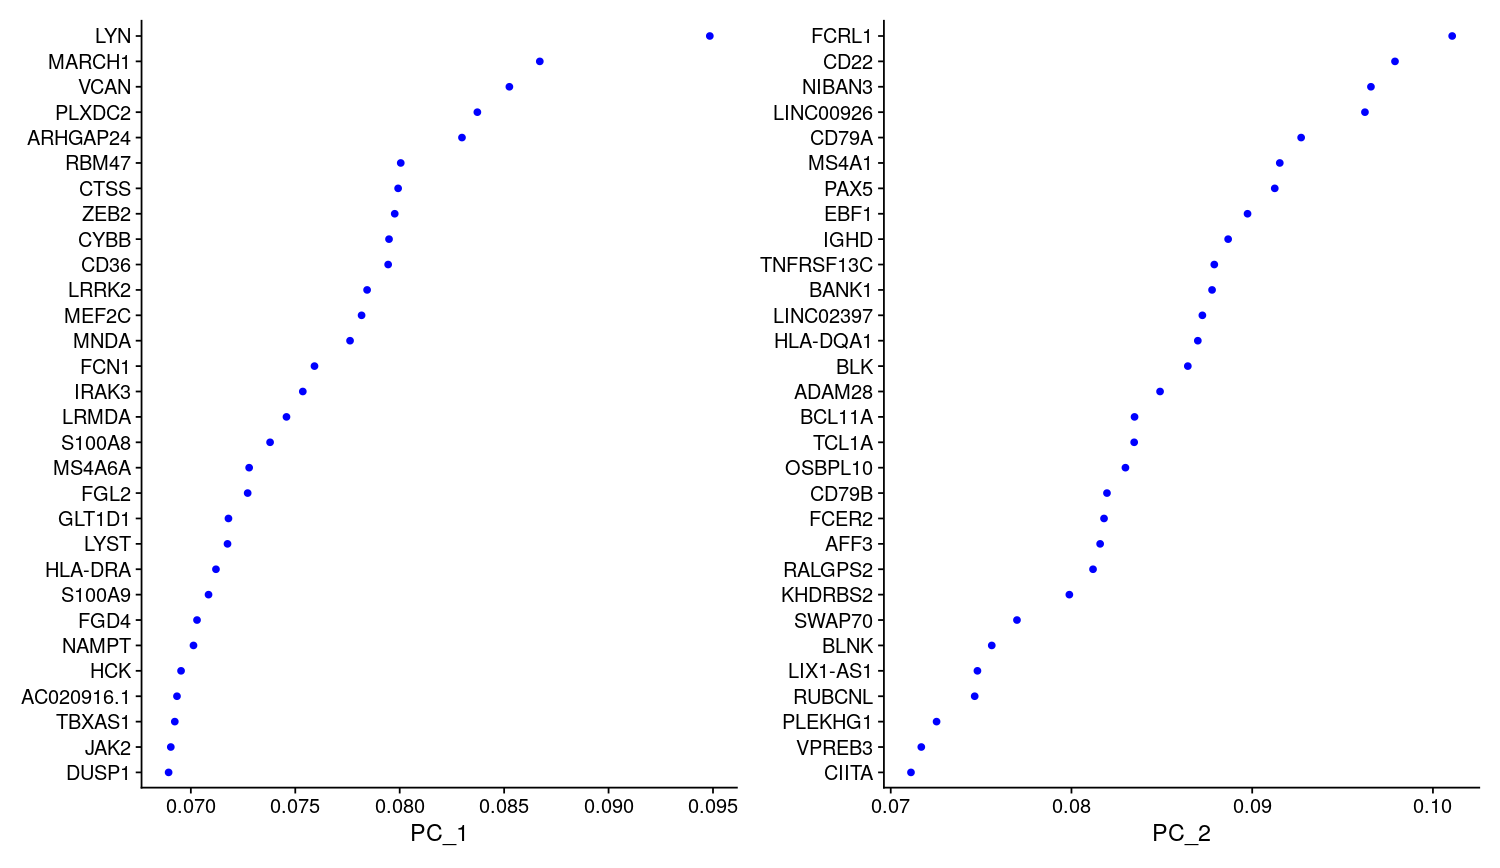

#### PCA after cluster assignment

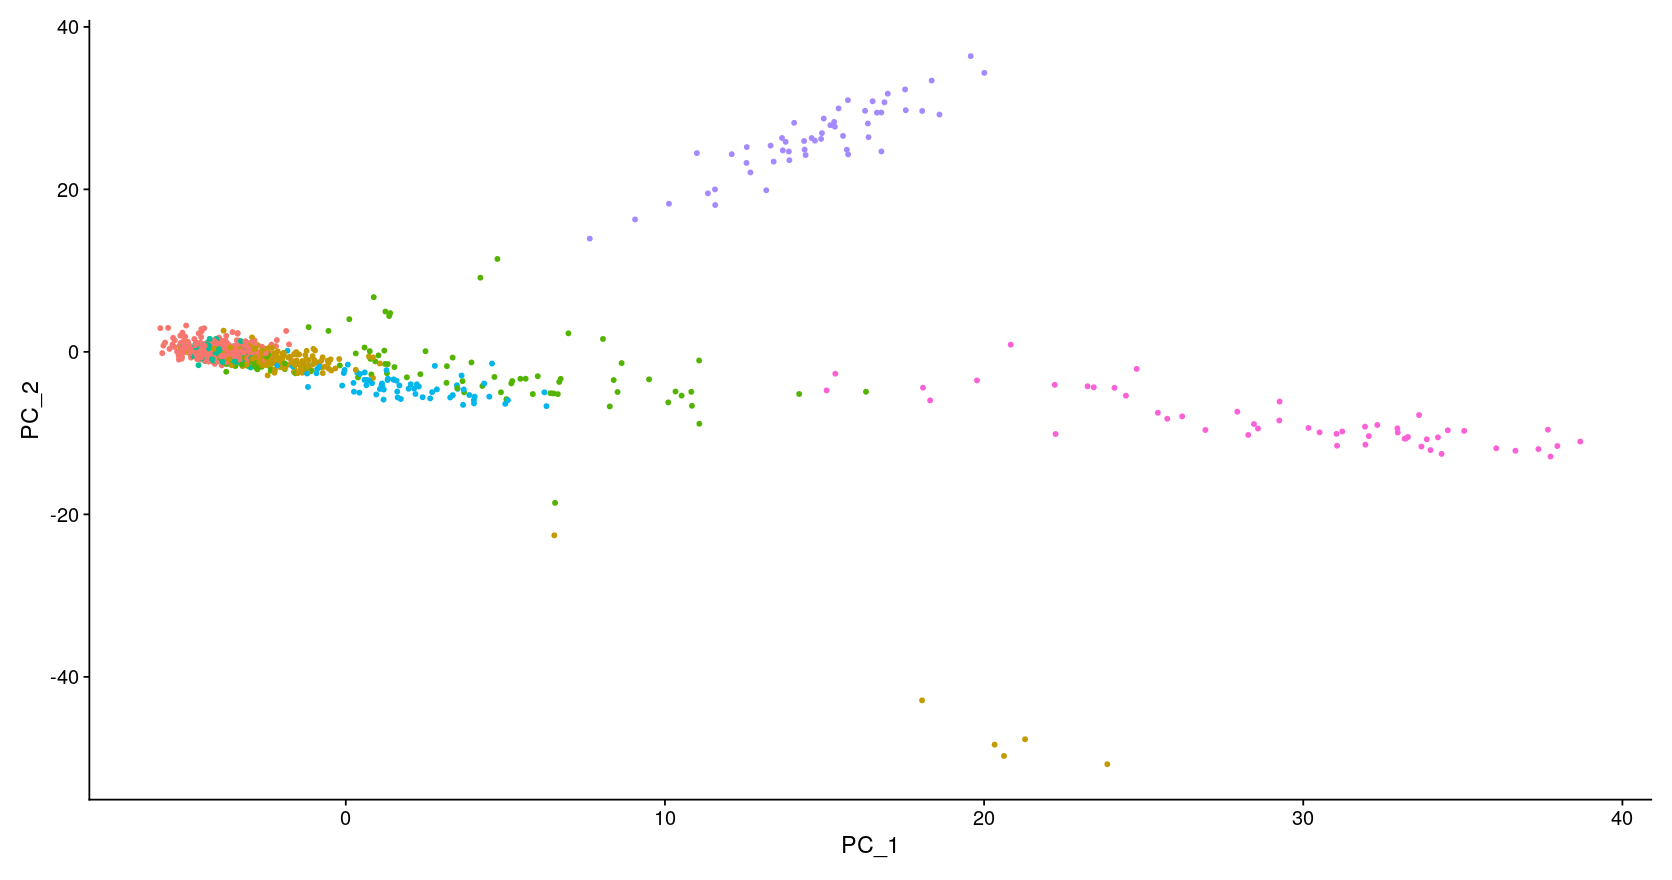

#### Elbow plot showing ranked principle components based on the percentage of variance

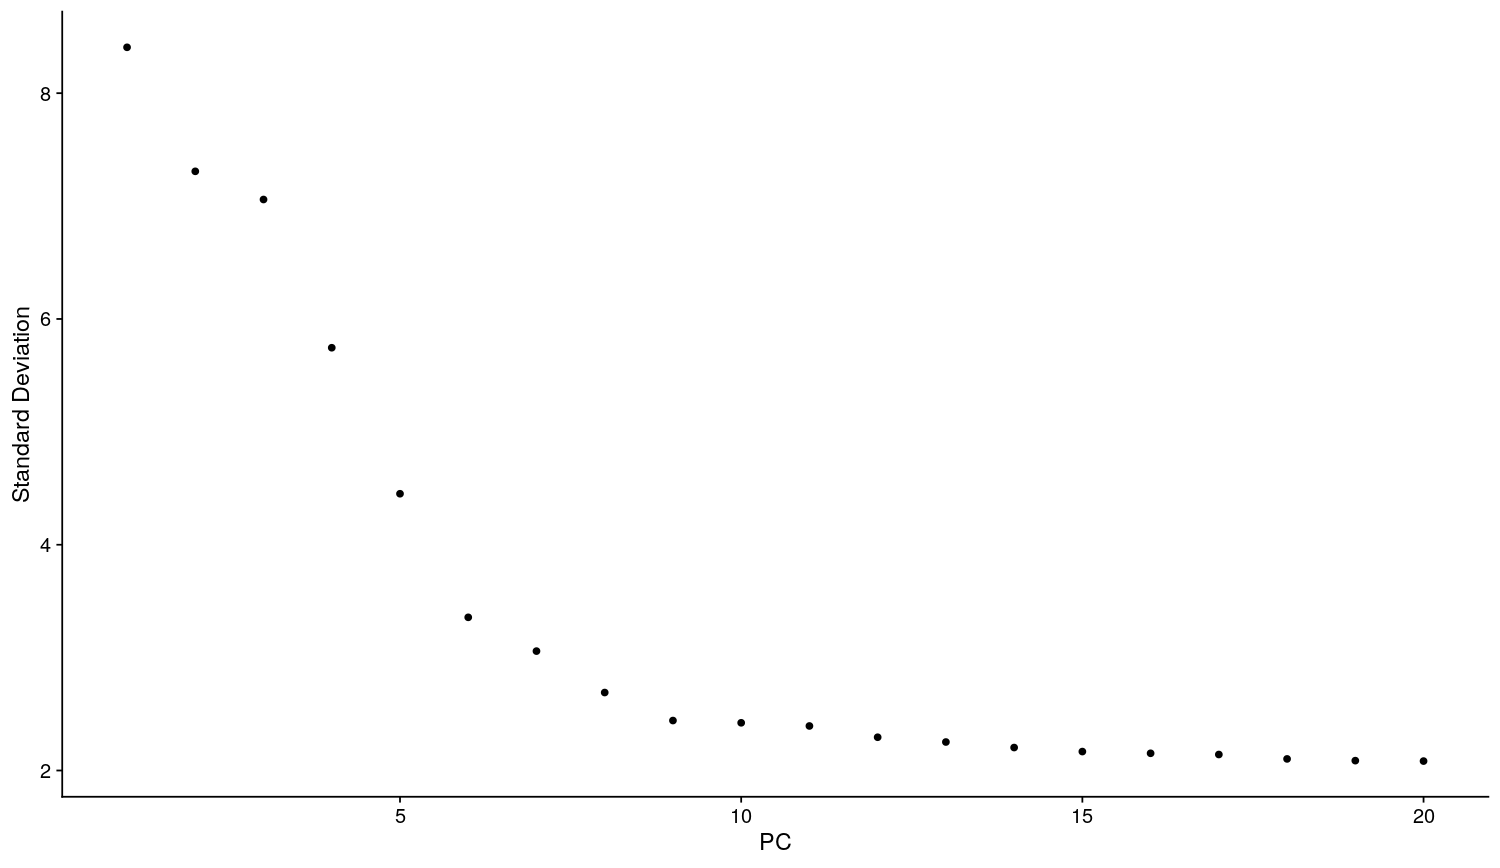

#### Umap after cluster assignment

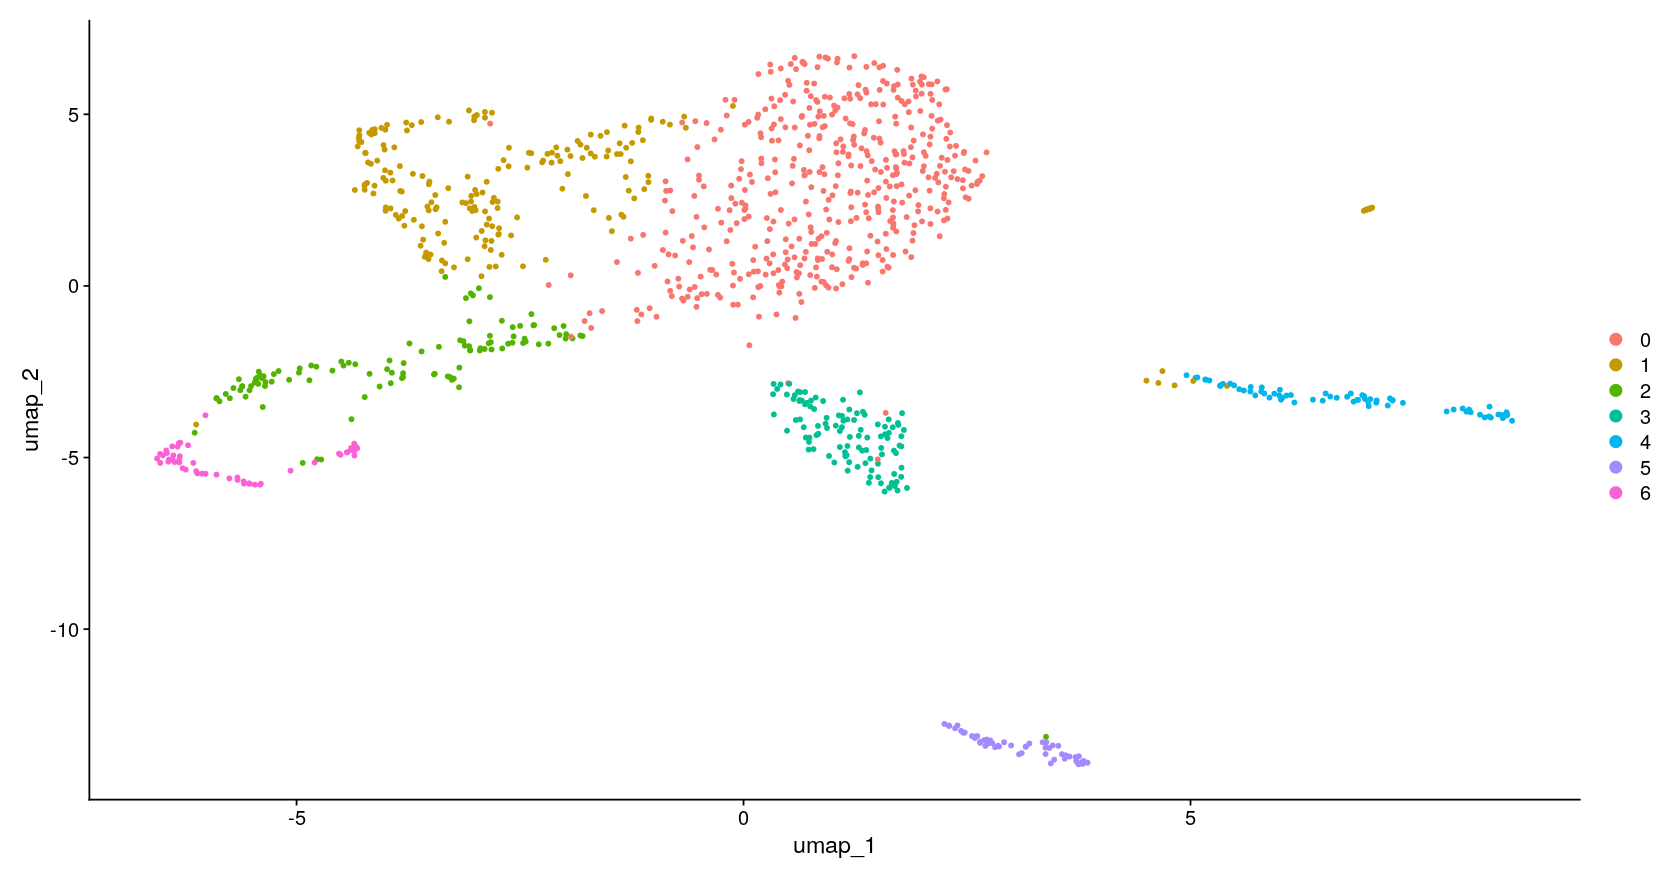

# **4. Identify specific genes**
### *Total Questions: 1*
### *Total Points: 50*


---

<div class="alert alert-block alert-warning">
    <h3>4. Identify highly variable genes</h3>
    <p>For these highly variable genes (select 3-4 genes), investigate if gene expression values are variable between identified clusters (plot (RStudio) and show violin plots here) </p>
</div>

In [ ]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

#### R code

<code>
#Initialize a list to store cluster markers
all_cluster_markers <- list()

#Loop through clusters to find all the markers in the respective clusters
for (i in 0:6) {
  cluster.markers <- FindMarkers(pbmc, ident.1 = i)
  
#Store the markers in the list
  all_cluster_markers[[paste0("Cluster", i)]] <- cluster.markers
}

#Access the markers for a specific cluster, for example, cluster 1 and 5
cluster1_markers <- all_cluster_markers[["Cluster1"]]
cluster5_markers <- all_cluster_markers[["Cluster5"]]

#Print the markers
print(head(cluster1_markers, n = 5))
print(head(cluster5_markers, n = 5))

#find markers for every cluster compared to all remaining cells, report only the positive ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE)
pbmc.markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > 1)

#Test for differential expression in cluster 0
cluster0.markers <- FindMarkers(pbmc, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)

#Violin plot to show expression probability distributions across clusters for top 4 genes
VlnPlot(pbmc, features = c("S100A9", "S100A8", "GNLY", "IGKC"))

#Violin plot to show expression probability distribution using raw counts
VlnPlot(pbmc, features = c("S100A9", "S100A8", "GNLY", "IGKC"), slot = "counts", log = TRUE)
</code>

#### Check the cluster markers for randomly selected cluster

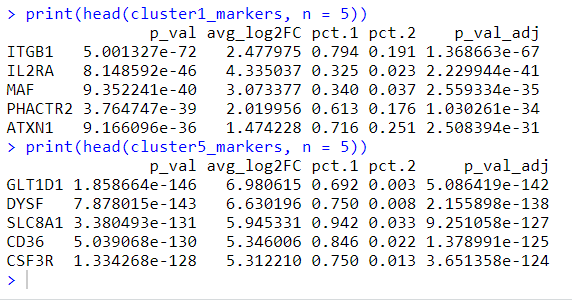

#### Violin plot showing the expression levels of top4 genes

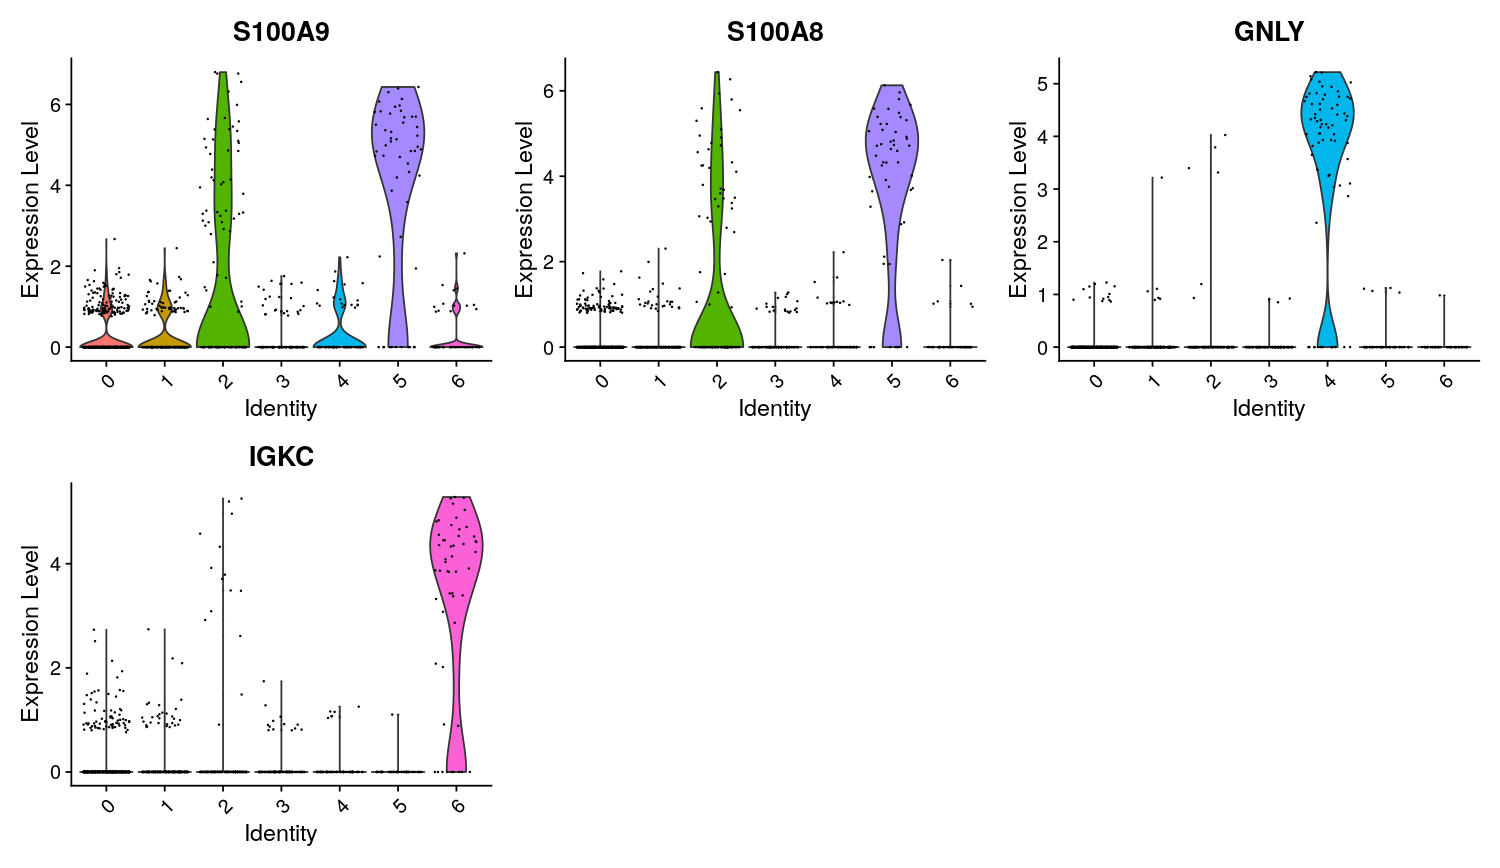

#### Violin plot showing the expression levels of top4 genes using raw counts

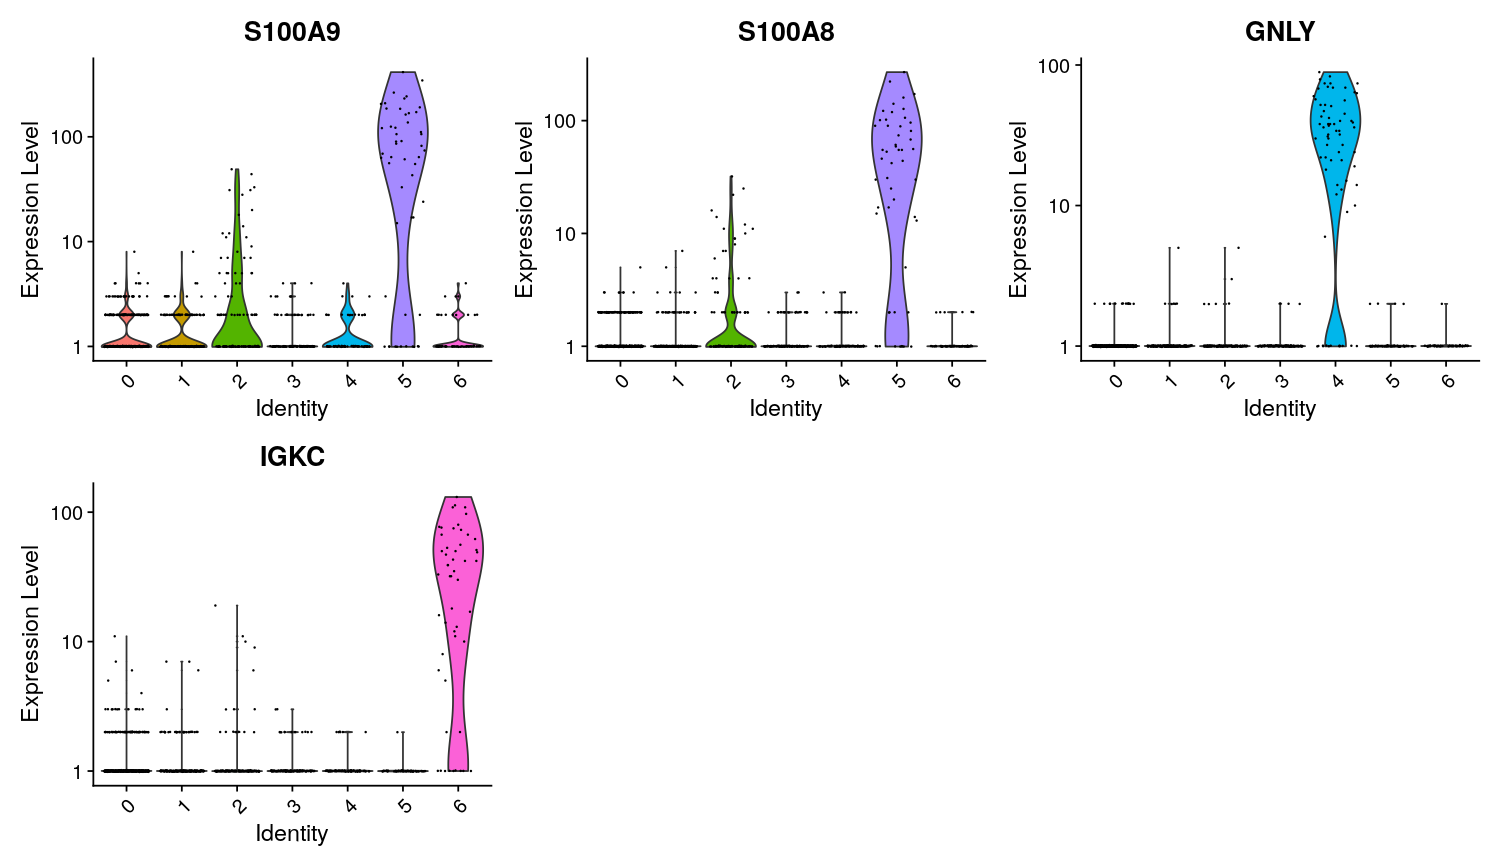